In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

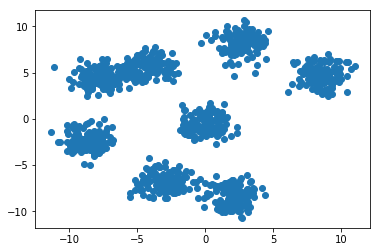

In [2]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


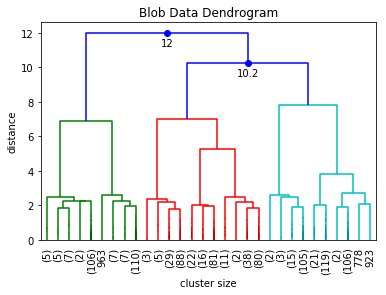

In [4]:
# Take normal dendrogram output and stylize in cleaner way

def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Blob Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

dn = annotated_dendrogram(distances)
plt.show()

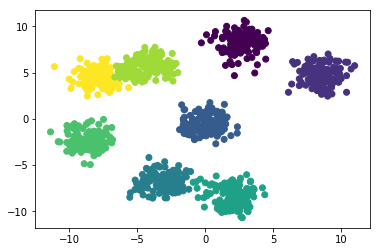

In [5]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

In [6]:
#  Unit Test

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import unittest
class TestFcluster(unittest.TestCase): 
    X2, y2 = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
    def test_X_y(self):
        self.assertEqual(len(self.X2),len(X))
        self.assertEqual(len(self.y2),len(y))
        
    def test_distances(self):
        distances2 = linkage(self.X2, method="centroid", metric="euclidean")
        self.assertEqual(len(distances2),len(distances))
        
    def test_scipy_clusters(self):
        distances2 = linkage(self.X2, method="centroid", metric="euclidean")
        scipy_clusters2 = fcluster(distances2, 3, criterion="distance")
        self.assertEqual(len(scipy_clusters2),len(scipy_clusters))

In [8]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestFcluster)
unittest.TextTestRunner(verbosity=2).run(suite)

test_X_y (__main__.TestFcluster) ... ok
test_distances (__main__.TestFcluster) ... ok
test_scipy_clusters (__main__.TestFcluster) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.126s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>